# Load the data from excel file

### Logistic Classifier

In [1]:
#Libraries in use
import pandas as pd
from matplotlib import pyplot

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from warnings import simplefilter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Please set the correct file path
#Load the saved csv files

path_gs = r'C:\Users\maheshp\Desktop\CQF Study\Module 4\exam\Python file\GS.csv' # Goldman Sachs 5 years daily data
#Please reset the file path
path_wfc = r'C:\Users\maheshp\Desktop\CQF Study\Module 4\exam\Python file\wfc.csv' # Wells Fargo 5 years daily data
#Please reset the file path

In [3]:
# Creating the dataset
def create_dataset(path1,path2):
    data_gs = pd.read_csv(path1) 
    data_wfc = pd.read_csv(path2)
    data_gs['Date'] = pd.to_datetime(data_gs['Date']) # Convert to the date format
    data_wfc['Date'] = pd.to_datetime(data_wfc['Date'])
    data_gs = data_gs[['Date','Adj Close']]
    data_wfc = data_wfc[['Date','Adj Close']]
    data_gs['Momentum-1D'] = (data_gs['Adj Close'] - data_gs['Adj Close'].shift(1))
    data_wfc['Momentum-1D'] = (data_wfc['Adj Close'] - data_wfc['Adj Close'].shift(1))
    data_gs['MA-20D'] =  data_gs['Adj Close'].rolling(window=20).mean() # 20 Days Moving Average
    data_wfc['MA-20D'] = data_wfc['Adj Close'].rolling(window=20).mean()
    data_gs['EM-20D']= data_gs['Adj Close'].ewm(span=20).mean() #Exponential MA
    data_wfc['EM-20D'] = data_wfc['Adj Close'].ewm(span=20).mean()
    data_gs['SD-20D'] = (data_gs['Adj Close'].pct_change()).rolling(20).std()
    data_wfc['SD-20D'] = (data_wfc['Adj Close'].pct_change()).rolling(20).std()
    data_gs['return'] = np.log(data_gs['Adj Close']/data_gs['Adj Close'].shift(1))
    data_wfc['return'] = np.log(data_wfc['Adj Close']/data_wfc['Adj Close'].shift(1))
    lags = 7
    cols = []

    for lag in range(1, lags+1):  #log returns 
        col = 'ret_%d' % lag
        data_gs[col] = data_gs['return'].shift(lag)
        data_wfc[col] = data_wfc['return'].shift(lag)
        cols.append(col)
        
    data_gs = data_gs.dropna() #drop NA
    data_wfc = data_wfc.dropna()

    data_gs['return_sign'] =np.sign(data_gs['return'].values) # return sign
    data_wfc['return_sign'] =np.sign(data_wfc['return'].values)
    data_gs['return_sign']=data_gs['return_sign'].replace(-1,0)
    data_wfc['return_sign']=data_wfc['return_sign'].replace(-1,0)
    
    ## SVM Momentum Features Vs Return t-1
    data_gs['return_sign_t-1'] =np.sign(data_gs['ret_1'].values) # return sign
    data_wfc['return_sign_t-1'] =np.sign(data_wfc['ret_1'].values)
    data_gs['return_sign_t-1']=data_gs['return_sign_t-1'].replace(-1,0)
    data_wfc['return_sign_t-1']=data_wfc['return_sign_t-1'].replace(-1,0)
    data_gs=data_gs.reset_index()
    data_wfc=data_wfc.reset_index()
    return data_gs, data_wfc
    #print(data_gs.head(10))
 


In [4]:
# Creating the sub data sets

def feature_target_set1(): #feature set 1
    data_gs, data_wfc=create_dataset(path_gs,path_wfc)
    cols = ['ret_1','ret_2','ret_3','ret_4','ret_5','ret_6','ret_7']
    X_gs = data_gs[cols]
    X_wfc = data_wfc[cols]
    y_gs = data_gs['return_sign']
    y_wfc = data_wfc['return_sign']
    return X_gs, y_gs, X_wfc, y_wfc

def feature_target_set2(): #feature set 2
    data_gs, data_wfc=create_dataset(path_gs,path_wfc)
    cols = ['return','ret_1','ret_2','ret_3','ret_4','ret_5','ret_6','ret_7']
    X_gs = data_gs[cols]
    X_wfc = data_wfc[cols ]
    y_gs = data_gs['return_sign']
    y_wfc = data_wfc['return_sign']
    return X_gs, y_gs, X_wfc, y_wfc


def feature_target_set3(): #feature set 3
    data_gs, data_wfc=create_dataset(path_gs,path_wfc)
    cols = ['return','Momentum-1D','MA-20D','EM-20D','SD-20D']
    X_gs = data_gs[cols]
    X_wfc = data_wfc[cols ]
    y_gs = data_gs['return_sign']
    y_wfc = data_wfc['return_sign']
    return X_gs, y_gs, X_wfc, y_wfc
 
def feature_target_set4(): #feature set 4
    data_gs, data_wfc=create_dataset(path_gs,path_wfc)
    cols = ['Momentum-1D','MA-20D','EM-20D','SD-20D','return','ret_1','ret_2','ret_3','ret_4','ret_5','ret_6','ret_7']
    X_gs = data_gs[cols]
    X_wfc = data_wfc[cols ]
    y_gs = data_gs['return_sign']
    y_wfc = data_wfc['return_sign']
    return X_gs, y_gs, X_wfc, y_wfc

def feature_target_set_svm_M_vs_F(): # SVM Momentum vs Features
    data_gs, data_wfc=create_dataset(path_gs,path_wfc)
    cols = ['Momentum-1D','ret_1']
    X_gs = data_gs[cols]
    X_wfc = data_wfc[cols ]
    y_gs = data_gs['return_sign_t-1']
    y_wfc = data_wfc['return_sign_t-1']
    return X_gs, y_gs, X_wfc, y_wfc

 

#### A.1 Logistic Classifier

The two equities selected for the test are Goldman Sachs (GS) and Wells Fargo (WFC). 5 years of daily historical stock price used. 

In [5]:

def logistic_regresson(data_set,cost_F,C):
    
    X_gs, y_gs, X_wfc, y_wfc = data_set
    # split X and Y into training and testing sets
    X_train_gs,X_test_gs,y_train_gs,y_test_gs = train_test_split(X_gs,y_gs, test_size=0.25, random_state=0)
    X_train_wfc,X_test_wfc,y_train_wfc,y_test_wfc = train_test_split(X_wfc,y_wfc, test_size=0.25,random_state=0)
       

    # Fitting the model
    regressor_gs1 = LogisticRegression(penalty = cost_F,C=C,solver='liblinear',random_state=0) # C=1 is the default value 
    regressor_wfc1 = LogisticRegression(penalty = cost_F,C=C,solver='liblinear',random_state=0)    
    regressor_gs1.fit(X_train_gs, y_train_gs)
    regressor_wfc1.fit(X_train_wfc, y_train_wfc)
    y_pred_gs1 = regressor_gs1.predict(X_test_gs)
    y_pred_wfc1 = regressor_wfc1.predict(X_test_wfc)
    gs_classification_r = metrics.classification_report(y_test_gs,y_pred_gs1)
    wfc_classification_r = metrics.classification_report(y_test_wfc,y_pred_wfc1)
    
    print("Accuracy under the penalty:",cost_F)
    print('')
    print("GS-Accuracy:",metrics.accuracy_score(y_test_gs, y_pred_gs1))
    print("WFC-Accuracy:",metrics.accuracy_score(y_test_wfc, y_pred_wfc1))
    print('')
    print('Classification report for GS')
    print(gs_classification_r)
    print('')
    print('Classification report for WFC')
    print(wfc_classification_r)
    print('')
    coe_gs1= pd.DataFrame(zip(X_gs.columns,np.transpose(regressor_gs1.coef_[0])))
    coe_wfc1= pd.DataFrame(zip(X_wfc.columns,np.transpose(regressor_wfc1.coef_[0])))
    print('GS coefficients')
    print(coe_gs1)
    print('')
    print('WFC coefficients')
    print(coe_wfc1)
    print('')
    print('GS k-fold cross validation')
    k_fold = KFold(n_splits=10,shuffle=True)
    score_gs1 = cross_val_score(regressor_gs1,X_gs,y_gs,cv=k_fold)
    score_wfc1 = cross_val_score(regressor_wfc1,X_wfc,y_wfc,cv=k_fold)
    print(score_gs1)
    print('')
    print('GS Mean:',score_gs1.mean())
    print('GS STD:',score_gs1.std())
    print('')
    print('WFC k-fold cross validation')
    print(score_wfc1)
    print('')
    print('WFC Mean:',score_wfc1.mean())
    print('WFC STD:',score_wfc1.std())
    print('')


## Important:  Feature_target_set2 used  as main data set for the analysis 
#### A.1
##### Difference between the L1 and L2  cost function and impact on the regression coefficients

The L2 penalty favors relative small values for all weights, and avoids significantly large and small values for any weight, while L1 penalty allows some weights with significantly small value, and some with significantly large value. Therefore, when the penalty is equal to L1 coefficients will have either large value or smaller value. (significant variance between the coefficients). Under the penalty L2, coefficients will be small for all the variables.

In [6]:
logistic_regresson(feature_target_set2(),cost_F='l1',C=1)

Accuracy under the penalty: l1

GS-Accuracy: 1.0
WFC-Accuracy: 0.9967741935483871

Classification report for GS
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       150
         1.0       1.00      1.00      1.00       160

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310


Classification report for WFC
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       149
         1.0       1.00      0.99      1.00       161

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310


GS coefficients
        0           1
0  return  167.355216
1   ret_1    0.000000
2   ret_2    0.000000
3   ret_3    0.000000
4   ret_4    0.000000
5   ret_5    0.000000
6   ret_6    0.000000
7   ret_7 

#### A.1
##### L1
Penalty = L1, Large or small coefficients values. K-fold cross validation  has a mean accuracy close to 100% and a standard deviation of 0.0024 for feature_target_set2 data set.


In [7]:
logistic_regresson(feature_target_set2(),cost_F='l2',C=1)

Accuracy under the penalty: l2

GS-Accuracy: 0.7129032258064516
WFC-Accuracy: 0.8741935483870967

Classification report for GS
              precision    recall  f1-score   support

         0.0       1.00      0.41      0.58       150
         1.0       0.64      1.00      0.78       160

    accuracy                           0.71       310
   macro avg       0.82      0.70      0.68       310
weighted avg       0.82      0.71      0.68       310


Classification report for WFC
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88       149
         1.0       1.00      0.76      0.86       161

    accuracy                           0.87       310
   macro avg       0.90      0.88      0.87       310
weighted avg       0.90      0.87      0.87       310


GS coefficients
        0         1
0  return  4.783371
1   ret_1  0.027234
2   ret_2 -0.051945
3   ret_3 -0.015751
4   ret_4 -0.110604
5   ret_5  0.132208
6   ret_6  0.418728
7   ret_7 -

#### A.1
##### L2
Penalty = L1, Small coefficients for all. For L2, K-fold cross validation shows the much higher standard deviation compared to the L1 for feature_target_set2 data set.

In [8]:
def confusion_matrix_visual(data_set,cost_F,C): 
    X_gs, y_gs, X_wfc, y_wfc = data_set
     
    # split X and Y into training and testing sets
    
    X_train_gs,X_test_gs,y_train_gs,y_test_gs = train_test_split(X_gs,y_gs, test_size=0.25, random_state=0)
    X_train_wfc,X_test_wfc,y_train_wfc,y_test_wfc = train_test_split(X_wfc,y_wfc, test_size=0.25,random_state=0)    
    
    # Fitting the model
    regressor_gs1 = LogisticRegression(penalty = cost_F,C=C,solver='liblinear',random_state=0)
    regressor_wfc1 = LogisticRegression(penalty = cost_F,C=C,solver='liblinear',random_state=0)    
    regressor_gs1.fit(X_train_gs, y_train_gs)
    regressor_wfc1.fit(X_train_wfc, y_train_wfc)
    y_pred_gs1 = regressor_gs1.predict(X_test_gs)
    y_pred_wfc1 = regressor_wfc1.predict(X_test_wfc)
    
    mat_gs = metrics.confusion_matrix(y_test_gs,y_pred_gs1)
    print('GS Confusion Matrix')
    print('')
    print('Note that the output is switched for the rows and columns under the confusion matrix method.')
    print('')
    print(mat_gs)
    print('')
    
    print('')
    print('GS Confusion Matrix Table')
    print('')
    print(pd.crosstab(y_pred_gs1, y_test_gs))
    
    
    print('')
    class_labels = ['0','1']
    axes = sns.heatmap(mat_gs.T, square=False, annot=True, fmt='d',cbar=True,robust=True,cmap=plt.cm.Blues, ax=None)
    axes.set_xlabel('Actual')
    axes.set_ylabel('Model Prediction')
    
    tick_marks = np.arange(2) +0.5
    
    axes.set_xticks(tick_marks)
    axes.set_yticks(tick_marks)
    axes.set_xticklabels(class_labels)
    axes.set_yticklabels(class_labels, rotation=0)
    axes.set_title('GS Confusion Matrix')
    
    plt.show()
  

    mat_gs = metrics.confusion_matrix(y_test_wfc,y_pred_wfc1)
    print('WFC Confusion Matrix')
    print('')
    print(mat_gs)
    print('')
   
    print('WFC Confusion Matrix Table')
    print('')
    print(pd.crosstab(y_pred_wfc1, y_test_wfc))
    
    
    print('')
    class_labels = ['0','1']
    axes = sns.heatmap(mat_gs.T, square=False, annot=True, fmt='d',cbar=True,robust=True,cmap=plt.cm.Blues, ax=None)
    axes.set_xlabel('Actual')
    axes.set_ylabel('Model Prediction')
    
    tick_marks = np.arange(2) +0.5
    
    axes.set_xticks(tick_marks)
    axes.set_yticks(tick_marks)
    axes.set_xticklabels(class_labels)
    axes.set_yticklabels(class_labels, rotation=0)
    axes.set_title('WFC Confusion Matrix')
    
    plt.show()
    
    print('Please update to the Matplotlib 3.1.2 to avoid heatmap top and bottom boxes cut off')
    
    #github link for soluation https://github.com/mwaskom/seaborn/issues/1773
    


#### B.1 Confusion Matrix

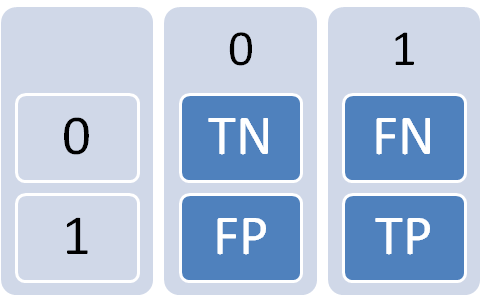

True Positive (TP): The model correctly predicts the outcome as positive.

True Negative (TN): The model correctly predicts the outcome as negative.

False Positive (FP): The model incorrectly predicted the outcome as positive, but the actual result is negative.

False Negative (FN): The model incorrectly predicted the outcome as negative, but the actual result is positive.

GS Confusion Matrix

Note that the output is switched for the rows and columns under the confusion matrix method.

[[150   0]
 [  0 160]]


GS Confusion Matrix Table

return_sign  0.0  1.0
row_0                
0.0          150    0
1.0            0  160



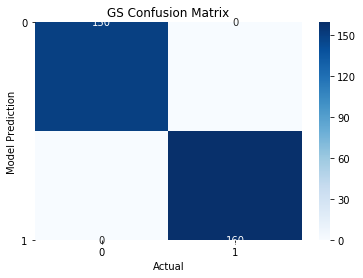

WFC Confusion Matrix

[[149   0]
 [  1 160]]

WFC Confusion Matrix Table

return_sign  0.0  1.0
row_0                
0.0          149    1
1.0            0  160



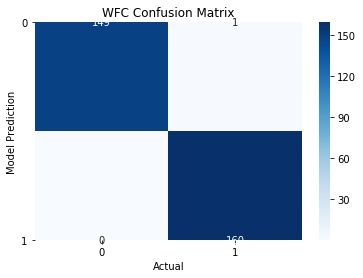

Please update to the Matplotlib 3.1.2 to avoid heatmap top and bottom boxes cut off


In [9]:
confusion_matrix_visual(feature_target_set2(),cost_F='l1',C=1)

#### B.1

Under the penalty = L1, Misclassification is very low (accuracy close to 100%)

GS Confusion Matrix

Note that the output is switched for the rows and columns under the confusion matrix method.

[[ 61  89]
 [  0 160]]


GS Confusion Matrix Table

return_sign  0.0  1.0
row_0                
0.0           61    0
1.0           89  160



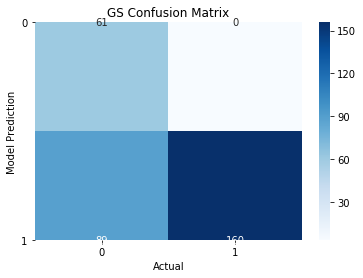

WFC Confusion Matrix

[[149   0]
 [ 39 122]]

WFC Confusion Matrix Table

return_sign  0.0  1.0
row_0                
0.0          149   39
1.0            0  122



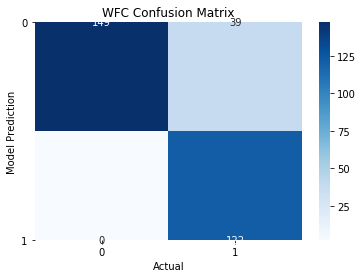

Please update to the Matplotlib 3.1.2 to avoid heatmap top and bottom boxes cut off


In [10]:
confusion_matrix_visual(feature_target_set2(),cost_F='l2',C=1)

#### B.1


False Positive Rate (FPR) (misclassified negative returns) : FP / (FP+TN). FPR corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points. 

Under the penalty = L2

For GS security

False Positive Rate (FPR) = FP / (FP+TN)

			      = 89/(89+61) = 59.333%

Misclassified negative returns close to 60%

In [11]:
def curve_roc(data_set,cost_F,C):
    X_gs, y_gs, X_wfc, y_wfc = data_set
    
    
    # split X and Y into training and testing sets
    X_train_gs,X_test_gs,y_train_gs,y_test_gs = train_test_split(X_gs,y_gs, test_size=0.25, random_state=0)
    X_train_wfc,X_test_wfc,y_train_wfc,y_test_wfc = train_test_split(X_wfc,y_wfc, test_size=0.25,random_state=0)
    
    # generate a no skill prediction (majority class)
    rc_probs = [0 for _ in range(len(y_test_gs))]
    wfc_rc_probs = [0 for _ in range(len(y_test_wfc))]
    
    # Fitting the model
    regressor_gs1 = LogisticRegression(penalty = cost_F,C=C,solver='liblinear',random_state=0)
    regressor_wfc1 = LogisticRegression(penalty = cost_F,C=C,solver='liblinear',random_state=0)    
    regressor_gs1.fit(X_train_gs, y_train_gs)
    regressor_wfc1.fit(X_train_wfc, y_train_wfc)
    y_pred_gs1 = regressor_gs1.predict(X_test_gs)
    y_pred_wfc1 = regressor_wfc1.predict(X_test_wfc)
    
    # predict probabilities
    gs_probs = regressor_gs1.predict_proba(X_test_gs)
    # keep probabilities for the positive outcome only
    gs_probs = gs_probs[:, 1]
    # calculate scores
    rc_auc = roc_auc_score(y_test_gs, rc_probs)
    gs_auc = roc_auc_score(y_test_gs, gs_probs)
    
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (rc_auc))
    print('Logistic: ROC AUC=%.3f' % (gs_auc))
    # calculate roc curves
    gs_ns_fpr, gs_ns_tpr, _ = roc_curve(y_test_gs, rc_probs)
    gs_fpr, gs_tpr, _ = roc_curve(y_test_gs, gs_probs)
    
    # plot the roc curve for the model
    pyplot.plot(gs_ns_fpr, gs_ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(gs_fpr, gs_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
    # predict probabilities
    wfc_probs = regressor_wfc1.predict_proba(X_test_wfc)
    # keep probabilities for the positive outcome only
    wfc_probs = wfc_probs[:, 1]
    # calculate scores
    rc_auc = roc_auc_score(y_test_wfc, wfc_rc_probs)
    wfc_auc = roc_auc_score(y_test_wfc, wfc_probs)
    
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (rc_auc))
    print('Logistic: ROC AUC=%.3f' % (wfc_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test_wfc, wfc_rc_probs)
    wfc_fpr, wfc_tpr, _ = roc_curve(y_test_wfc, wfc_probs)
    
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(wfc_fpr, wfc_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
    
    

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


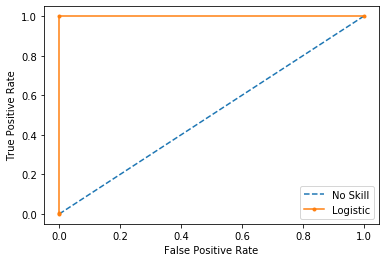

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


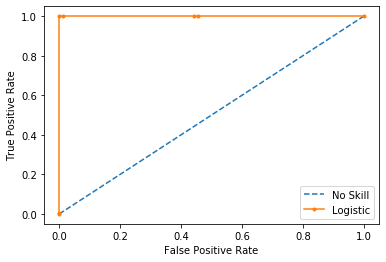

In [12]:
curve_roc(feature_target_set2(),cost_F='l1',C=1)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.998


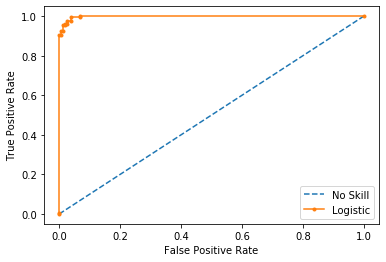

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.997


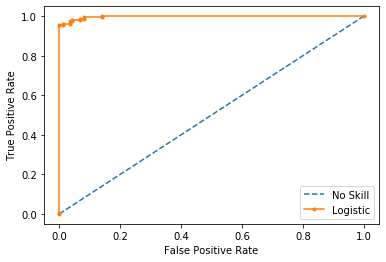

In [13]:
curve_roc(feature_target_set2(),cost_F='l2',C=1)

#### B.2

Accuracy under the different datasets
 
 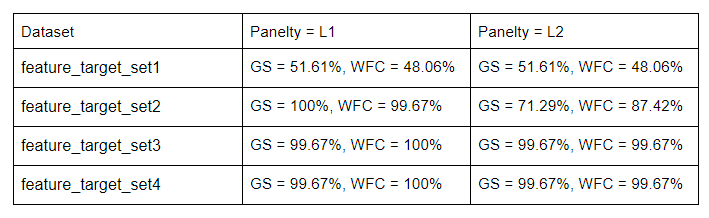
 
Except for the feature_target_set1 dataset, other two datasets will improve our accuracy. (other dataset results available under the supporting data)


In [14]:
def grid_searchCV(data_set):
    
    X_gs, y_gs, X_wfc, y_wfc = data_set    
    regressor = LogisticRegression(solver='liblinear', max_iter=500,random_state=0)
    penalty = ['l1','l2']

    C = np.logspace(0,4,10)

    hyperparameters = dict(C=C, penalty=penalty)

    clt = GridSearchCV(regressor, hyperparameters, cv=5, verbose=0,n_jobs=-1)

    best_model_gs1 = clt.fit(X_gs,y_gs)

    print('Best Penalty:', best_model_gs1.best_estimator_.get_params()['penalty'])
    print('Best C:', best_model_gs1.best_estimator_.get_params()['C'])
    
    

In [15]:
grid_searchCV(feature_target_set2())

Best Penalty: l1
Best C: 2.7825594022071245


#### B.2 GridSearchCV 

Parameter tuning help us to identify the best parameters for our model. 

Best Penalty: L1

Best C value : 2.78

Running the feature_target_set2 dataset again by chaning the value of the C, we can increase our accuracy to

GS Accuracy : 88.71% ( C=1 Accuracy : 71.29%)

WFC Accuracy : 94.84% ( C=1 Accuracy : 87.42% )

Also misclassified negative returns reduce to

False Positive Rate (FPR) = FP / (FP+TN)

             = 35/(35+115) = 23.33%
             
Misclassified  negative returns close to 20% (compared to C=1 FPR = 59.33%)

Therefore, the step we can take to reduce the misclassified negative returns

    1) Parameter tuning (GridSearchCV) to identify the best parameters
    
    2) Run the model again with the parameters identified using parameter tuning



In [16]:
logistic_regresson(feature_target_set2(),cost_F='l2',C=2.78) # after  replacing the C, no changes to the panelty

Accuracy under the penalty: l2

GS-Accuracy: 0.8870967741935484
WFC-Accuracy: 0.9483870967741935

Classification report for GS
              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87       150
         1.0       0.82      1.00      0.90       160

    accuracy                           0.89       310
   macro avg       0.91      0.88      0.88       310
weighted avg       0.91      0.89      0.89       310


Classification report for WFC
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       149
         1.0       1.00      0.90      0.95       161

    accuracy                           0.95       310
   macro avg       0.95      0.95      0.95       310
weighted avg       0.95      0.95      0.95       310


GS coefficients
        0          1
0  return  12.269543
1   ret_1   0.022109
2   ret_2  -0.122680
3   ret_3  -0.048798
4   ret_4  -0.224181
5   ret_5   0.345962
6   ret_6   1.037665
7  

GS Confusion Matrix

Note that the output is switched for the rows and columns under the confusion matrix method.

[[115  35]
 [  0 160]]


GS Confusion Matrix Table

return_sign  0.0  1.0
row_0                
0.0          115    0
1.0           35  160



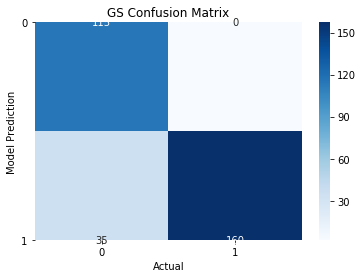

WFC Confusion Matrix

[[149   0]
 [ 16 145]]

WFC Confusion Matrix Table

return_sign  0.0  1.0
row_0                
0.0          149   16
1.0            0  145



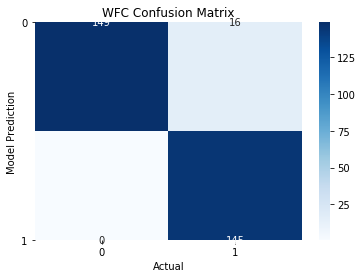

Please update to the Matplotlib 3.1.2 to avoid heatmap top and bottom boxes cut off


In [17]:
confusion_matrix_visual(feature_target_set2(),cost_F='l2',C=2.78)

#### B.2

Another way to find the optimal value for c is to graph the c against the F1 score.


In [18]:
def grid_searchCV1(data_set):
    
    X_gs, y_gs, X_wfc, y_wfc = data_set
    
    # split X and Y into training and testing sets
    N_X_train_gs,V_X_test_gs,N_y_train_gs,V_y_test_gs = train_test_split(X_gs,y_gs, test_size=0.25, random_state=0)
    X_train_wfc,X_test_wfc,y_train_wfc,y_test_wfc = train_test_split(X_wfc,y_wfc, test_size=0.25,random_state=0)
    
    regularization_strengths = np.logspace(-1, 1, num=10)
    scores = []
    
    for regularization_strength in regularization_strengths:
        pipeline = Pipeline([('scale', MinMaxScaler()),('lr', LogisticRegression( solver='liblinear', class_weight='balanced',
            random_state=0, C=regularization_strength))]).fit(N_X_train_gs, N_y_train_gs)
        scores.append(metrics.f1_score(pipeline.predict(V_X_test_gs), V_y_test_gs))
    
    print(scores)
    plt.plot(regularization_strengths, scores,'o-')
    plt.xlabel('regularization strength (C)')
    plt.ylabel('F1 score')
    plt.title('F1 score vs. Regularization Strength')
    plt.show()
        
        
                                                                                          

#### B.2

Highest value for F score is at C =10

[0.927710843373494, 0.9415384615384615, 0.9473684210526315, 0.95625, 0.9559748427672956, 0.96875, 0.9781931464174455, 0.98125, 0.98125, 0.9843260188087775]


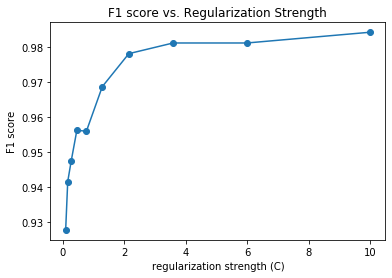

In [19]:
grid_searchCV1(feature_target_set2())

#### B.2

False Positive Rate (FPR) = FP / (FP+TN)

             = 12/(12+138) = 8.00%
             
Misclassified negative returns can be reduce further

GS Confusion Matrix

Note that the output is switched for the rows and columns under the confusion matrix method.

[[138  12]
 [  0 160]]


GS Confusion Matrix Table

return_sign  0.0  1.0
row_0                
0.0          138    0
1.0           12  160



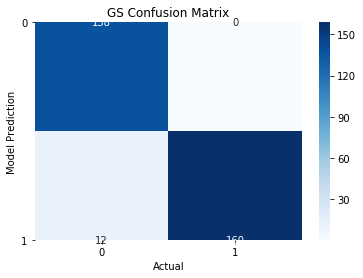

WFC Confusion Matrix

[[149   0]
 [  9 152]]

WFC Confusion Matrix Table

return_sign  0.0  1.0
row_0                
0.0          149    9
1.0            0  152



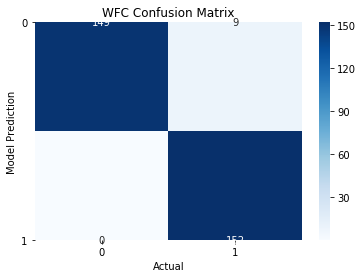

Please update to the Matplotlib 3.1.2 to avoid heatmap top and bottom boxes cut off


In [20]:
confusion_matrix_visual(feature_target_set2(),cost_F='l2',C=10)

#### B.3

Scatter plot for probabilities of up and down moves, using colour codes for correctly and incorrectly realised prediction. 


In [21]:
def predict_probabilities(data_set,cost_F):
    data_gs, data_wfc=create_dataset(path_gs,path_wfc)
    X_gs, y_gs, X_wfc, y_wfc = data_set
    
    
    # split X and Y into training and testing sets
    X_train_gs,X_test_gs,y_train_gs,y_test_gs = train_test_split(X_gs,y_gs, test_size=0.25, random_state=0)
    X_train_wfc,X_test_wfc,y_train_wfc,y_test_wfc = train_test_split(X_wfc,y_wfc, test_size=0.25,random_state=0)
    
    # generate a no skill prediction (majority class)
    rc_probs = [0 for _ in range(len(y_test_gs))]
    
    # Fitting the model
    regressor_gs1 = LogisticRegression(penalty = cost_F,solver='liblinear', max_iter=100)
    regressor_wfc1 = LogisticRegression(penalty = cost_F,solver='liblinear', max_iter=100)    
    regressor_gs1.fit(X_train_gs, y_train_gs)
    regressor_wfc1.fit(X_train_wfc, y_train_wfc)
    y_pred_gs1 = regressor_gs1.predict(X_test_gs)
    y_pred_wfc1 = regressor_wfc1.predict(X_test_wfc)
    
    # predict probabilities
    gs_probs = regressor_gs1.predict_proba(X_test_gs)
   
    
    y_test_gs_n = np.array(y_test_gs)
    y_pred_gs1_n = np.array(y_pred_gs1)
    row_data = {'Prediction':y_pred_gs1_n,'Actual':y_test_gs_n}
    y_pred_gs_d = pd.DataFrame(y_pred_gs1_n)
    y_test_gs_d = pd.DataFrame(y_test_gs_n)
    
    data_f = pd.DataFrame(row_data, columns=['Prediction','Actual'])
    data_f['Equal']= data_f['Prediction']==data_f['Actual']

    
    # Plot data points and color using their class
    print('GS Security')
    print('')
    color = ["red" if c == True else "black" for c in data_f['Equal']]
    plt.scatter(data_gs['Date'].iloc[-len(gs_probs):],gs_probs[:, 0],c=color,label='Correct')
    plt.legend()
    plt.show()

    # predict probabilities
    wfc_probs = regressor_wfc1.predict_proba(X_test_wfc)
   
    
    y_test_wfc_n = np.array(y_test_wfc)
    y_pred_wfc1_n = np.array(y_pred_wfc1)
    row_data1 = {'Prediction':y_pred_wfc1_n,'Actual':y_test_wfc_n}
    y_pred_wfc_d = pd.DataFrame(y_pred_wfc1_n)
    y_test_wfc_d = pd.DataFrame(y_test_wfc_n)
    
    data_f1 = pd.DataFrame(row_data1, columns=['Prediction','Actual'])
    data_f1['Equal']= data_f1['Prediction']==data_f1['Actual']

    
    # Plot data points and color using their class
    print('WFC Security')
    print('')
    color1 = ["red" if c == True else "black" for c in data_f['Equal']]
    plt.scatter(data_wfc['Date'].iloc[-len(wfc_probs):],wfc_probs[:, 0],c=color1,label='Correct')
    plt.legend()
    plt.show()

GS Security



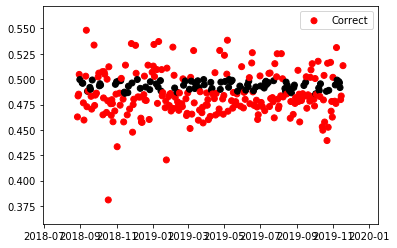

WFC Security



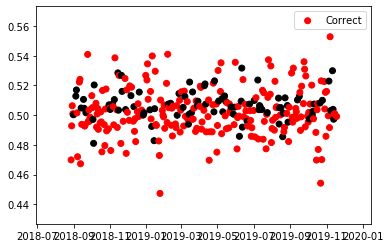

In [22]:
predict_probabilities(feature_target_set2(),cost_F='l2')

### KNN

#### A.1, B.1, B.2 Bayesian Classifier (KNN Model)

In [23]:
def knn_model(data_set,k_value):
    
    X_gs_k, y_gs_k, X_wfc_k, y_wfc_k = data_set
    
    # split X and Y into training and testing sets
    X_train_gs,X_test_gs,y_train_gs,y_test_gs = train_test_split(X_gs_k,y_gs_k, test_size=0.25, random_state=0)
    X_train_wfc,X_test_wfc,y_train_wfc,y_test_wfc = train_test_split(X_wfc_k,y_wfc_k, test_size=0.25,random_state=0)

    # Fitting the model
    knn_gs1 = KNeighborsClassifier(n_neighbors=k_value)
    knn_wfc1 = KNeighborsClassifier(n_neighbors=k_value)   
    knn_gs1.fit(X_train_gs, y_train_gs)
    knn_wfc1.fit(X_train_wfc, y_train_wfc)
    y_pred_gs1 = knn_gs1.predict(X_test_gs)
    y_pred_wfc1 = knn_wfc1.predict(X_test_wfc)

    #print("Accuracy under the penalty:",cost_F)
    print("GS-Accuracy:",metrics.accuracy_score(y_test_gs, y_pred_gs1))
    print("WFC-Accuracy:",metrics.accuracy_score(y_test_wfc, y_pred_wfc1))
    
    # cross validation to find the optimal k
    cv_scores = []
    
    # number of folds  
    
    folds = 10
    
    # creating odd value list for K (to avoid the tie between two classes)
    
    k_list = list(range(1,int(len(X_test_gs)*((folds-1)/folds))))
    
    # k must not be a multiple of the number of classes (0,1)
    
    k_list = [k for k in k_list if k%2 !=0]
       
    
    for k in k_list:
        
        knn = KNeighborsClassifier(n_neighbors=k)
        
        scores = cross_val_score(knn,X_gs_k,y_gs_k, cv=folds, scoring='accuracy')
        mean = scores.mean()
        cv_scores.append(mean)
        
        
    
    # miscalculation error for each k
    
    mis_E = [1- x for x in cv_scores]
    
    optimal_k_value =k_list[mis_E.index(min(mis_E))]
    
    print('optimal value for k is', optimal_k_value, 'and accuracy is',cv_scores[optimal_k_value])
    
    plt.plot(k_list,mis_E)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()
    
            

GS-Accuracy: 0.8741935483870967
WFC-Accuracy: 0.867741935483871
optimal value for k is 137 and accuracy is 0.9402095462890113


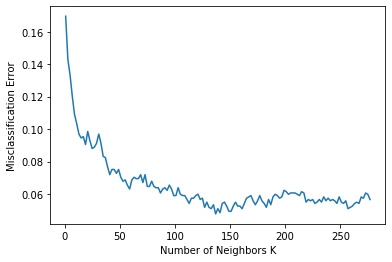

In [24]:
knn_model(feature_target_set2(),10)

### SVM

#### A.2 Support Vector Machines

By changing the C value, we can change between soft and hard margin.


In [25]:
def support_v_machines(data_set,C,G):  
    data_gs, data_wfc=create_dataset(path_gs,path_wfc)
    X_gs, y_gs, X_wfc, y_wfc = data_set

    
    # split X and Y into training and testing sets
    X_train_gs,X_test_gs,y_train_gs,y_test_gs = train_test_split(X_gs,y_gs, test_size=0.25, random_state=0)
    X_train_wfc,X_test_wfc,y_train_wfc,y_test_wfc = train_test_split(X_wfc,y_wfc, test_size=0.25,random_state=0)
    
    
    clf_gs = svm.SVC(kernel='rbf', C=C, gamma=G)
    clf_wfc = svm.SVC(kernel='rbf', C=C, gamma=G)
    
    clf_gs.fit(X_train_gs,y_train_gs)
    y_pred_gs = clf_gs.predict(X_test_gs)

    clf_wfc.fit(X_train_wfc,y_train_wfc)
    y_pred_wfc = clf_wfc.predict(X_test_wfc)

    from sklearn import metrics
    print('C:',C,',', 'Gamma:',G)
    print('')
    print("Accuracy:",metrics.accuracy_score(y_test_gs, y_pred_gs))
    print("Accuracy:",metrics.accuracy_score(y_test_wfc, y_pred_wfc))


    import matplotlib.pyplot as plt
    plt.scatter(data_gs['Date'].iloc[-len(y_pred_gs):],y_pred_gs,c=y_pred_gs)
    plt.show()
    plt.scatter(data_wfc['Date'].iloc[-len(y_pred_wfc):],y_pred_wfc,c=y_pred_wfc)
    plt.show()
    

#### A.2 Support Vector Machines

Large value of parameter C = Small Margin (Hard)

Small value of parameter C = Large Margin (Soft)

Hard Margin sensitive to outlier and it only works with data that linearly separable.

C= 100 and gamma = 0.1, Accuracy : GS - 96.77%, WFC - 94.84%

C= 1 and gamma = 0.1, Accuracy : GS - 51.61%, WFC - 48.06%

Hard margin (small margin) has higher accuracy. (feature_target_set2 dataset)


C: 100 , Gamma: 0.1

Accuracy: 0.967741935483871
Accuracy: 0.9483870967741935


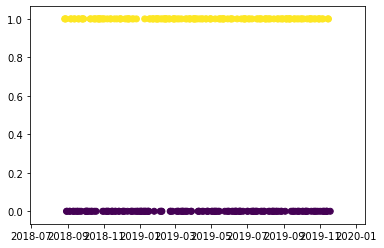

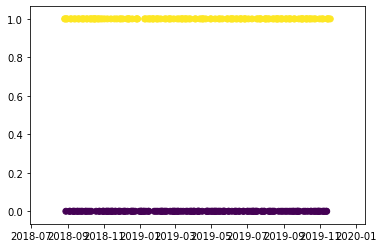

In [26]:
support_v_machines(feature_target_set2(),C=100,G=0.1)

C: 1 , Gamma: 0.1

Accuracy: 0.5161290322580645
Accuracy: 0.4806451612903226


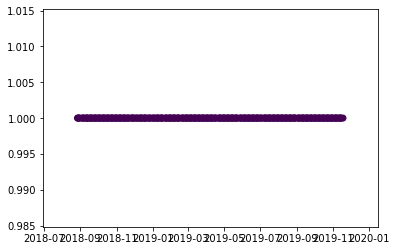

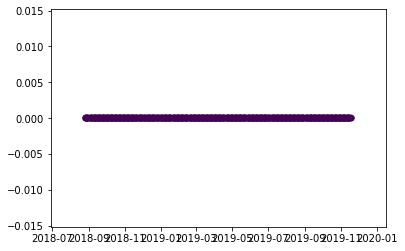

In [27]:
support_v_machines(feature_target_set2(),C=1,G=0.1)

#### A.2 Support Vector Machines

Momentum Features vs Return t-1 2D visualisation 

In [28]:
def visualisation_svm(data_set,C):
    
    data_gs, data_wfc=create_dataset(path_gs,path_wfc)
    X_gs, y_gs, X_wfc, y_wfc = data_set
    
    gs_features = X_gs
    gs_target = y_gs
    wfc_features = X_wfc
    wfc_target = y_wfc
    # Standardize features
    gs_scaler = StandardScaler()
    gs_features_S = gs_scaler.fit_transform(gs_features)
    wfc_scaler = StandardScaler()
    wfc_features_S = wfc_scaler.fit_transform(wfc_features)
    # Create support vector classifier
    gs_svc = LinearSVC(C=C)
    wfc_svc = LinearSVC(C=C)
    # Train model
    gs_model = gs_svc.fit(gs_features_S, gs_target)
    wfc_model = wfc_svc.fit(wfc_features_S, wfc_target)

    # Plot data points and color using their class
    color = ["red" if c == 0 else "black" for c in gs_target]
    plt.scatter(gs_features_S[:,0], gs_features_S[:,1], c=color)

    # Create the hyperplane
    gs_w = gs_svc.coef_[0]
    gs_a = -gs_w[0] / gs_w[1]
    gs_xx = np.linspace(-6.5, 6.5)
    gs_yy = gs_a * gs_xx - (gs_svc.intercept_[0]) / gs_w[1]
    
    print('GS Visualisation')

    # Plot the hyperplane
    plt.plot(gs_xx, gs_yy)
    plt.axis("off"), plt.show();

    # Plot data points and color using their class
    color = ["red" if c == 0 else "black" for c in gs_target]
    plt.scatter(wfc_features_S[:,0], wfc_features_S[:,1], c=color)

    # Create the hyperplane
    wfc_w = wfc_svc.coef_[0]
    wfc_a = -wfc_w[0] / wfc_w[1]
    wfc_xx = np.linspace(-6.5, 6.5)
    wfc_yy = wfc_a * wfc_xx - (wfc_svc.intercept_[0]) / wfc_w[1]
    
    print('WFC Visualisation')

    # Plot the hyperplane
    plt.plot(wfc_xx, wfc_yy)
    plt.axis("off"), plt.show();    

GS Visualisation


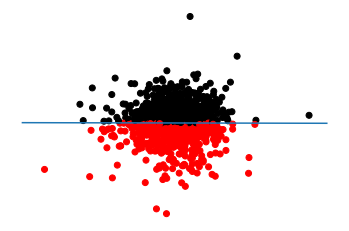

WFC Visualisation


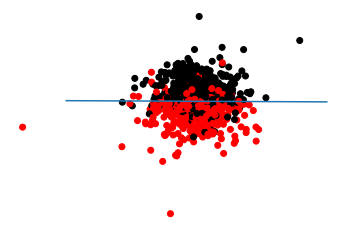

In [29]:
visualisation_svm(feature_target_set_svm_M_vs_F(),C=1.0)

#### B.1 Support Vector Machines

Confusion Matrix

In [30]:
def confusion_matrix_visual_SVM(data_set,C,G): 
    X_gs, y_gs, X_wfc, y_wfc = data_set
     
    # split X and Y into training and testing sets
    
    X_train_gs,X_test_gs,y_train_gs,y_test_gs = train_test_split(X_gs,y_gs, test_size=0.25, random_state=0)
    X_train_wfc,X_test_wfc,y_train_wfc,y_test_wfc = train_test_split(X_wfc,y_wfc, test_size=0.25,random_state=0)
    
    gs_scaler = StandardScaler()
    gs_standardized = gs_scaler.fit_transform(X_train_gs)
    
    clf_gs = svm.SVC(kernel='rbf', C=C, gamma=G)
    clf_wfc = svm.SVC(kernel='rbf', C=C, gamma=G)
    
    # Fitting the model
    clf_gs.fit(X_train_gs,y_train_gs)
    y_pred_gs = clf_gs.predict(X_test_gs)

    clf_wfc.fit(X_train_wfc,y_train_wfc)
    y_pred_wfc = clf_wfc.predict(X_test_wfc)

    
    mat_gs = metrics.confusion_matrix(y_test_gs,y_pred_gs)
    print('GS Confusion Matrix')
    print('')
    print(mat_gs)    
    print('')
    print('Note that the output is switched for the rows and columns under the confusion matrix method.')
    print('')
    print('GS Confusion Matrix Table')
    print('')
    print(pd.crosstab(y_pred_gs, y_test_gs))
    
    class_labels = ['0','1']
    axes = sns.heatmap(mat_gs.T, square=False, annot=True, fmt='d',cbar=True,robust=True,cmap=plt.cm.Blues, ax=None)
    axes.set_xlabel('Actual')
    axes.set_ylabel('Model Prediction')
    tick_marks = np.arange(2) + 0.5
    axes.set_xticks(tick_marks)
    axes.set_yticks(tick_marks)
    axes.set_xticklabels(class_labels)
    axes.set_yticklabels(class_labels, rotation=0)
    axes.set_title('Confusion Matrix')
    plt.show()
    
    mat_wfc = metrics.confusion_matrix(y_test_wfc,y_pred_wfc)
    print('WFC Confusion Matrix')
    print('')
    print(mat_wfc)    
    print('')
    print('Note that the output is switched for the rows and columns under the confusion matrix method.')
    print('')
    print('WFC Confusion Matrix Table')
    print('')
    print(pd.crosstab(y_pred_wfc, y_test_wfc))
    
    class_labels = ['0','1']
    axes = sns.heatmap(mat_wfc.T, square=False, annot=True, fmt='d',cbar=True,robust=True,cmap=plt.cm.Blues, ax=None)
    axes.set_xlabel('Actual')
    axes.set_ylabel('Model Prediction')
    tick_marks = np.arange(2) + 0.5
    axes.set_xticks(tick_marks)
    axes.set_yticks(tick_marks)
    axes.set_xticklabels(class_labels)
    axes.set_yticklabels(class_labels, rotation=0)
    axes.set_title('Confusion Matrix')
    plt.show()
    
    print('Please update to the Matplotlib 3.1.2 to avoid heatmap top and bottom boxes cut off')
    
    #github link for soluation https://github.com/mwaskom/seaborn/issues/1773
  

GS Confusion Matrix

[[148   2]
 [  8 152]]

Note that the output is switched for the rows and columns under the confusion matrix method.

GS Confusion Matrix Table

return_sign  0.0  1.0
row_0                
0.0          148    8
1.0            2  152


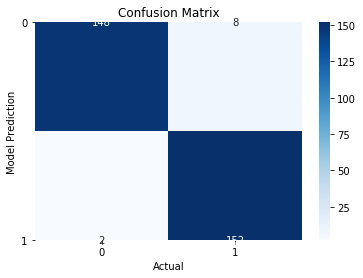

WFC Confusion Matrix

[[149   0]
 [ 16 145]]

Note that the output is switched for the rows and columns under the confusion matrix method.

WFC Confusion Matrix Table

return_sign  0.0  1.0
row_0                
0.0          149   16
1.0            0  145


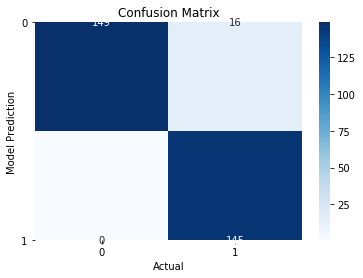

Please update to the Matplotlib 3.1.2 to avoid heatmap top and bottom boxes cut off


In [31]:
confusion_matrix_visual_SVM(feature_target_set2(),C=100,G=0.1)

GS Confusion Matrix

[[  0 150]
 [  0 160]]

Note that the output is switched for the rows and columns under the confusion matrix method.

GS Confusion Matrix Table

return_sign  0.0  1.0
row_0                
1.0          150  160


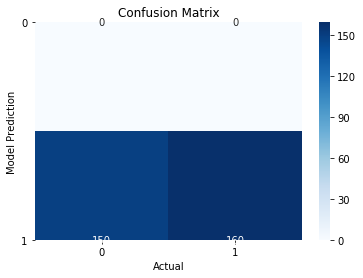

WFC Confusion Matrix

[[149   0]
 [161   0]]

Note that the output is switched for the rows and columns under the confusion matrix method.

WFC Confusion Matrix Table

return_sign  0.0  1.0
row_0                
0.0          149  161


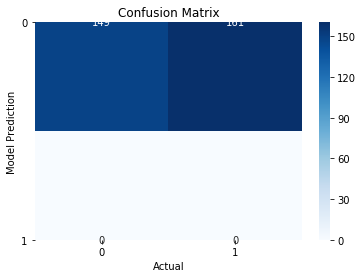

Please update to the Matplotlib 3.1.2 to avoid heatmap top and bottom boxes cut off


In [32]:
confusion_matrix_visual_SVM(feature_target_set2(),C=1,G=0.1)

#### B.2 Support Vector Machines

C = 1 

For GS security:

False Positive Rate (FPR) = FP / (FP+TN)

			      = 150/(0+150) = 100%

Misclassified negative returns is 100%

For WFC security:

False Positive Rate (FPR) = FP / (FP+TN)

			      = 149/(0+149) = 100%

Misclassified negative returns is 100%

C = 100

For GS security:

False Positive Rate (FPR) = FP / (FP+TN)

			      = 2/(2+148) = 1.33%

Misclassified negative returns is 1.33%

For WFC security:

False Positive Rate (FPR) = FP / (FP+TN)

			      = 0/(0+149) = 0%

Misclassified negative returns is 0%

Hard margin (small margin) has higher accuracy. (feature_target_set2 dataset)


#### B.1 Support Vector Machines
ROC Curve

In [33]:
def curve_roc_SVM(data_set,C1,G):
    X_gs, y_gs, X_wfc, y_wfc = data_set
    
    
    # split X and Y into training and testing sets
    X_train_gs,X_test_gs,y_train_gs,y_test_gs = train_test_split(X_gs,y_gs, test_size=0.25, random_state=0)
    X_train_wfc,X_test_wfc,y_train_wfc,y_test_wfc = train_test_split(X_wfc,y_wfc, test_size=0.25,random_state=0)
    
    # generate a no skill prediction (majority class)
    rc_probs = [0 for _ in range(len(y_test_gs))]
    

    clf_gs1 = svm.SVC(kernel='rbf', C=C1, gamma=G,probability=True)
    clf_wfc1 = svm.SVC(kernel='rbf', C=C1, gamma=G,probability=True)
    
    # Fitting the model
    clf_gs1.fit(X_train_gs,y_train_gs)
    y_pred_gs = clf_gs1.predict(X_test_gs)

    clf_wfc1.fit(X_train_wfc,y_train_wfc)
    y_pred_wfc = clf_wfc1.predict(X_test_wfc)

    
    # predict probabilities
    gs_probs = clf_gs1.predict_proba(X_test_gs)
    # keep probabilities for the positive outcome only
    gs_probs = gs_probs[:, 1]
    # calculate scores
    rc_auc = roc_auc_score(y_test_gs, rc_probs)
    gs_auc = roc_auc_score(y_test_gs, gs_probs)
    
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (rc_auc))
    print('Logistic: ROC AUC=%.3f' % (gs_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test_gs, rc_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test_gs, gs_probs)
    
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
    # predict probabilities
    wfc_probs = clf_wfc1.predict_proba(X_test_wfc)
    # keep probabilities for the positive outcome only
    wfc_probs = wfc_probs[:, 1]
    # calculate scores
    rc_auc = roc_auc_score(y_test_wfc, rc_probs)
    wfc_auc = roc_auc_score(y_test_wfc, wfc_probs)
    
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (rc_auc))
    print('Logistic: ROC AUC=%.3f' % (wfc_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test_wfc, rc_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test_wfc, gs_probs)
    
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.998


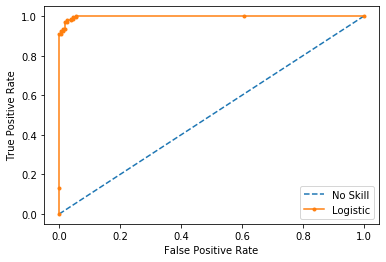

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.004


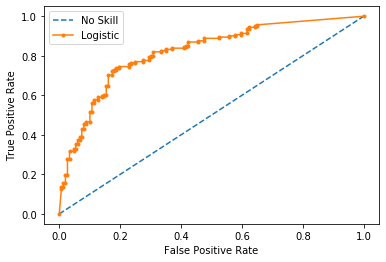

In [34]:
curve_roc_SVM(feature_target_set2(),C1=1,G=0.1)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.997


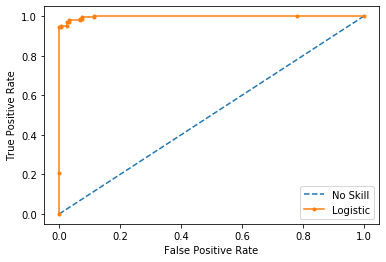

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.995


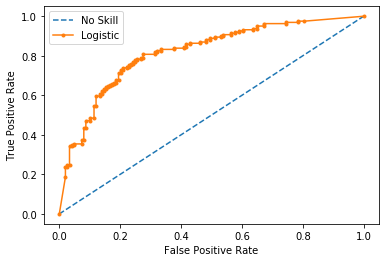

In [35]:
curve_roc_SVM(feature_target_set2(),C1=100,G=0.1)

In [36]:
def gridsearchCV_SVM(data_set,nfolds):
    X_gs, y_gs, X_wfc, y_wfc = data_set
    
    Cs = [0.001, 0.01, 0.1, 1, 10,20,100]
    gammas = [1e-4, 1e-3, 0.01, 0.1,0.2,0.5, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_gs, y_gs)
    grid_search.best_params_
    print("Best parameters set found on development set:")
    print()
    print(grid_search.best_params_)
    print()
    print("Grid scores on training set:")
    print()
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
     print("%0.3f (+/-%0.03f) for %r"
     % (mean, std * 2, params))
    print()
    

#### B.2 Support Vector Machines

GridSearchCV can be use to find the optimal values for C and Gamma

Optimal C and Gamma value for feature_target_set2

C = 100 and Gamma: 1


In [37]:
gridsearchCV_SVM(feature_target_set2(),5)

Best parameters set found on development set:

{'C': 100, 'gamma': 1}

Grid scores on training set:

0.514 (+/-0.002) for {'C': 0.001, 'gamma': 0.0001}
0.514 (+/-0.002) for {'C': 0.001, 'gamma': 0.001}
0.514 (+/-0.002) for {'C': 0.001, 'gamma': 0.01}
0.514 (+/-0.002) for {'C': 0.001, 'gamma': 0.1}
0.514 (+/-0.002) for {'C': 0.001, 'gamma': 0.2}
0.514 (+/-0.002) for {'C': 0.001, 'gamma': 0.5}
0.514 (+/-0.002) for {'C': 0.001, 'gamma': 1}
0.514 (+/-0.002) for {'C': 0.01, 'gamma': 0.0001}
0.514 (+/-0.002) for {'C': 0.01, 'gamma': 0.001}
0.514 (+/-0.002) for {'C': 0.01, 'gamma': 0.01}
0.514 (+/-0.002) for {'C': 0.01, 'gamma': 0.1}
0.514 (+/-0.002) for {'C': 0.01, 'gamma': 0.2}
0.514 (+/-0.002) for {'C': 0.01, 'gamma': 0.5}
0.514 (+/-0.002) for {'C': 0.01, 'gamma': 1}
0.514 (+/-0.002) for {'C': 0.1, 'gamma': 0.0001}
0.514 (+/-0.002) for {'C': 0.1, 'gamma': 0.001}
0.514 (+/-0.002) for {'C': 0.1, 'gamma': 0.01}
0.514 (+/-0.002) for {'C': 0.1, 'gamma': 0.1}
0.514 (+/-0.002) for {'C': 0.1, 'gam

#### B.2 Support Vector Machines

By changing the C and Gamma value we can improve our accuracy from 50% (around) to 100% (around) 

GS Confusion Matrix

[[ 16 134]
 [  0 160]]

Note that the output is switched for the rows and columns under the confusion matrix method.

GS Confusion Matrix Table

return_sign  0.0  1.0
row_0                
0.0           16    0
1.0          134  160


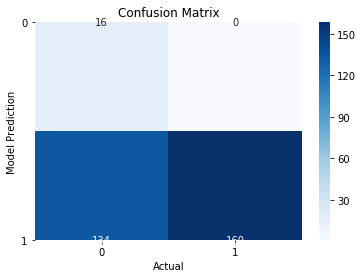

WFC Confusion Matrix

[[149   0]
 [138  23]]

Note that the output is switched for the rows and columns under the confusion matrix method.

WFC Confusion Matrix Table

return_sign  0.0  1.0
row_0                
0.0          149  138
1.0            0   23


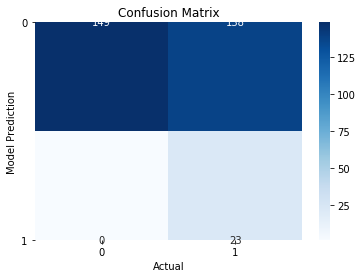

Please update to the Matplotlib 3.1.2 to avoid heatmap top and bottom boxes cut off


In [38]:
confusion_matrix_visual_SVM(feature_target_set2(),C=1,G=1)

C = 100 and Gamma =1

For GS security:

False Positive Rate (FPR) = FP / (FP+TN)

			      = 1/(1+149) = 0.667%

Misclassified negative returns is 100%

For WFC security:

False Positive Rate (FPR) = FP / (FP+TN)

			      = 0/(0+149) = 0%

Misclassified negative returns is 0%

Hard margin (small margin) has higher accuracy. (feature_target_set2 dataset)

#### B.3 Support Vector Machines



In [39]:
def predict_probabilities_SVM(data_set,C1,G):
    data_gs, data_wfc=create_dataset(path_gs,path_wfc)
    X_gs, y_gs, X_wfc, y_wfc = data_set
    
    
    # split X and Y into training and testing sets
    X_train_gs,X_test_gs,y_train_gs,y_test_gs = train_test_split(X_gs,y_gs, test_size=0.25, random_state=0)
    X_train_wfc,X_test_wfc,y_train_wfc,y_test_wfc = train_test_split(X_wfc,y_wfc, test_size=0.25,random_state=0)
    
    # generate a no skill prediction (majority class)
    rc_probs = [0 for _ in range(len(y_test_gs))]
    

    clf_gs1 = svm.SVC(kernel='rbf', C=C1, gamma=G,probability=True)
    clf_wfc1 = svm.SVC(kernel='rbf', C=C1, gamma=G,probability=True)
    
    # Fitting the model
    clf_gs1.fit(X_train_gs,y_train_gs)
    y_pred_gs = clf_gs1.predict(X_test_gs)

    clf_wfc1.fit(X_train_wfc,y_train_wfc)
    y_pred_wfc = clf_wfc1.predict(X_test_wfc)

    
    # predict probabilities
    gs_probs_svm = clf_gs1.predict_proba(X_test_gs)
    
    
    y_test_gs_n = np.array(y_test_gs)
    y_pred_gs_n = np.array(y_pred_gs)
    row_data = {'Prediction':y_pred_gs_n,'Actual':y_test_gs_n}
    y_pred_gs_d = pd.DataFrame(y_pred_gs_n)
    y_test_gs_d = pd.DataFrame(y_test_gs_n)
    
    data_f = pd.DataFrame(row_data, columns=['Prediction','Actual'])
    data_f['Equal']= data_f['Prediction']==data_f['Actual']

    
    # Plot data points and color using their class
    print('GS Security')
    print('')
    color = ["red" if c == True else "black" for c in data_f['Equal']]
    plt.scatter(data_gs['Date'].iloc[-len(gs_probs_svm):],gs_probs_svm[:, 0],c=color,label='Correct')
    plt.legend()
    plt.show()


GS Security



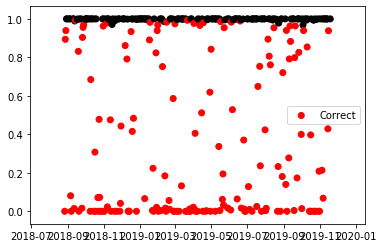

In [40]:
predict_probabilities_SVM(feature_target_set2(),C1=1,G=0.1)

### Supporting Data

In [41]:
logistic_regresson(feature_target_set3(),cost_F='l1',C=1)

Accuracy under the penalty: l1

GS-Accuracy: 0.9967741935483871
WFC-Accuracy: 1.0

Classification report for GS
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       150
         1.0       1.00      0.99      1.00       160

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310


Classification report for WFC
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       149
         1.0       1.00      1.00      1.00       161

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310


GS coefficients
             0          1
0       return   0.000000
1  Momentum-1D  16.431242
2       MA-20D  -0.001372
3       EM-20D   0.000000
4       SD-20D   0.000000

WFC coefficients
            

In [42]:
logistic_regresson(feature_target_set3(),cost_F='l2',C=1)

Accuracy under the penalty: l2

GS-Accuracy: 0.9967741935483871
WFC-Accuracy: 0.9967741935483871

Classification report for GS
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       150
         1.0       1.00      0.99      1.00       160

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310


Classification report for WFC
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       149
         1.0       1.00      0.99      1.00       161

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310


GS coefficients
             0         1
0       return  0.033406
1  Momentum-1D  6.370244
2       MA-20D -0.036479
3       EM-20D  0.034693
4       SD-20D -0.014293

WFC coefficients
   

In [43]:
logistic_regresson(feature_target_set4(),cost_F='l1',C=1)

Accuracy under the penalty: l1

GS-Accuracy: 0.9967741935483871
WFC-Accuracy: 1.0

Classification report for GS
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       150
         1.0       1.00      0.99      1.00       160

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310


Classification report for WFC
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       149
         1.0       1.00      1.00      1.00       161

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310


GS coefficients
              0          1
0   Momentum-1D  16.431239
1        MA-20D  -0.001372
2        EM-20D   0.000000
3        SD-20D   0.000000
4        return   0.000000
5         ret_1   0.0000

In [44]:
logistic_regresson(feature_target_set4(),cost_F='l2',C=1)

Accuracy under the penalty: l2

GS-Accuracy: 0.9967741935483871
WFC-Accuracy: 0.9967741935483871

Classification report for GS
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       150
         1.0       1.00      0.99      1.00       160

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310


Classification report for WFC
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       149
         1.0       1.00      0.99      1.00       161

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310


GS coefficients
              0         1
0   Momentum-1D  6.369942
1        MA-20D -0.036239
2        EM-20D  0.034442
3        SD-20D -0.014618
4        return  0.033411
5         ret_1